Description of the DATASET
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30
---------------------------------------------------------------------------------
    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls
---------------------------------------------------------------------------------


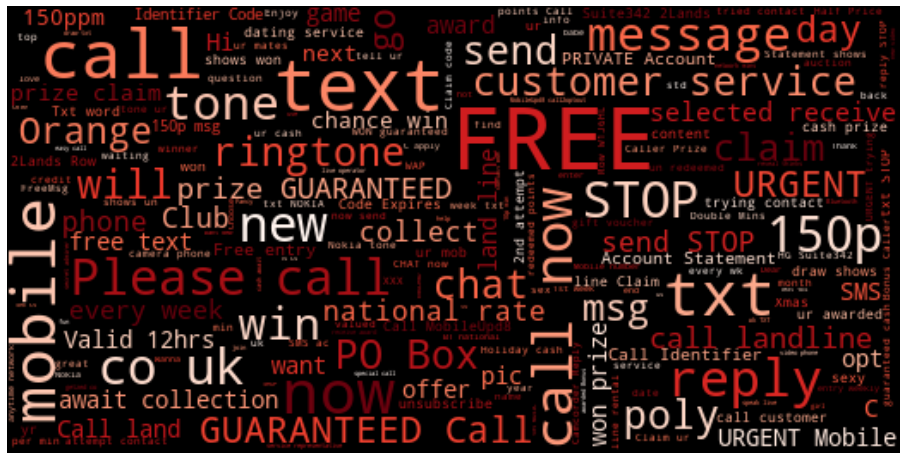

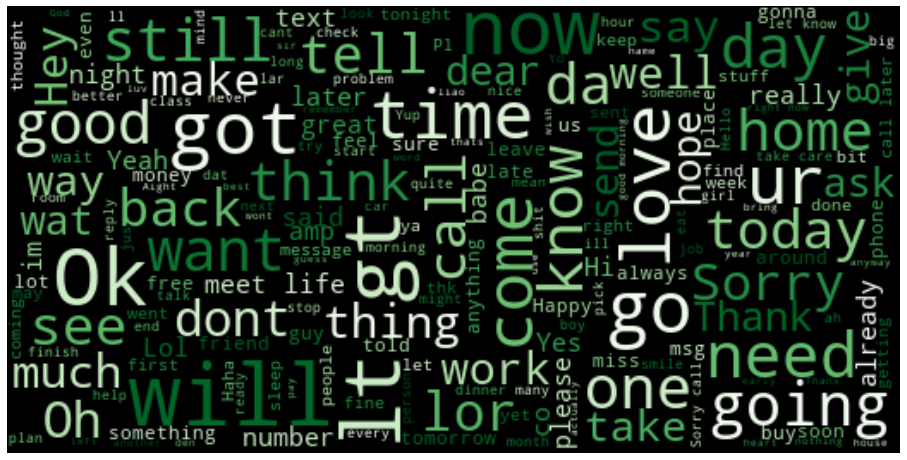

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


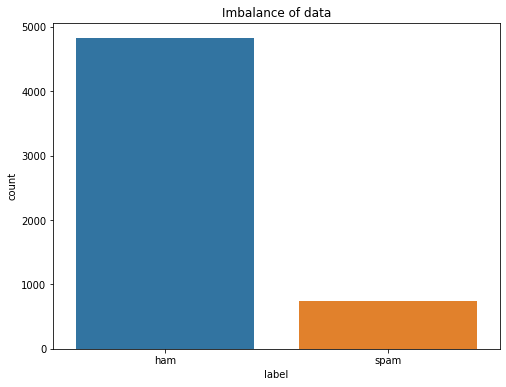

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of spam messages is : 
(747, 2)
Number of ham messages is : 
(747, 2)
---------------------------------------------------------------------------------


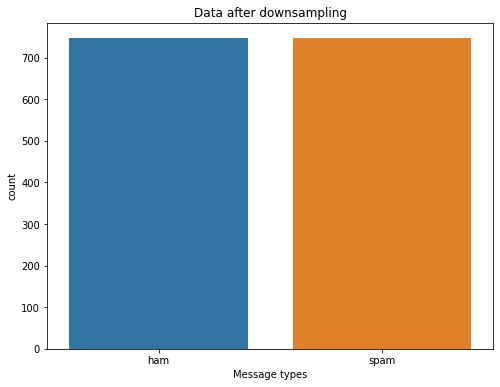

       Length of Text
label                
ham         73.238286
spam       138.670683
---------------------------------------------------------------------------------
[0 0 0 ... 1 1 1]
---------------------------------------------------------------------------------
There are 4169 unique tokens in training data. 
---------------------------------------------------------------------------------
training tensor shape: (1195, 50)
Testing tensor shape:  (299, 50)
length of the sequences before padding :
27 24
length of the sequences after padding :
50 50
Example before
[1, 47, 186, 9, 34, 1, 3, 24, 1, 2, 274, 2, 7, 152, 275, 135, 34, 10, 15, 6, 7, 34, 274, 85, 15, 17, 1]
after
[  1  47 186   9  34   1   3  24   1   2 274   2   7 152 275 135  34  10
  15   6   7  34 274  85  15  17   1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
---------------------------------------------------------------------------------
Epoch 1/100
38/38 - 6s - loss

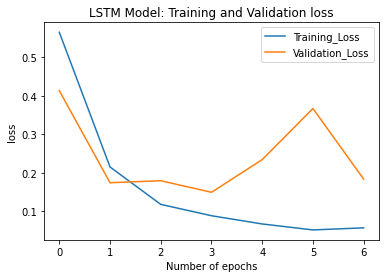

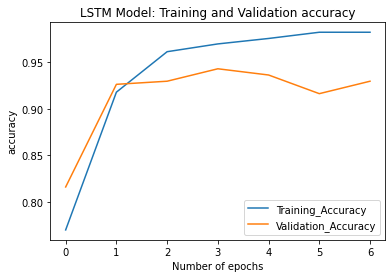

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
____________________________________________________

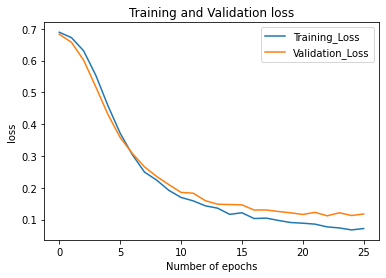

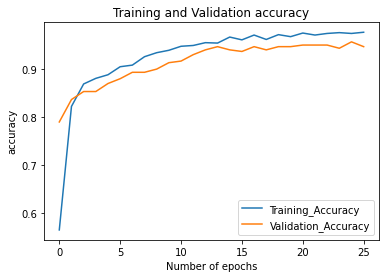

Epoch 1/100
38/38 - 5s - loss: 0.5737 - accuracy: 0.7674 - val_loss: 0.4600 - val_accuracy: 0.8161 - 5s/epoch - 143ms/step
Epoch 2/100
38/38 - 1s - loss: 0.2448 - accuracy: 0.9079 - val_loss: 0.1629 - val_accuracy: 0.9298 - 1s/epoch - 30ms/step
Epoch 3/100
38/38 - 1s - loss: 0.1255 - accuracy: 0.9523 - val_loss: 0.1340 - val_accuracy: 0.9498 - 1s/epoch - 30ms/step
Epoch 4/100
38/38 - 1s - loss: 0.1008 - accuracy: 0.9665 - val_loss: 0.1667 - val_accuracy: 0.9264 - 1s/epoch - 29ms/step
Epoch 5/100
38/38 - 1s - loss: 0.0764 - accuracy: 0.9774 - val_loss: 0.1415 - val_accuracy: 0.9565 - 1s/epoch - 30ms/step


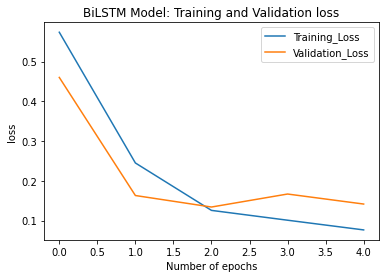

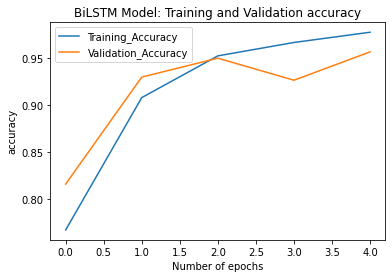

10/10 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9465
Dense architecture loss and accuracy: [0.11786216497421265, 0.9464883208274841] 
10/10 [==============================] - 0s 10ms/step - loss: 0.1838 - accuracy: 0.9298
LSTM architecture loss and accuracy: [0.18383894860744476, 0.9297658801078796] 
10/10 [==============================] - 0s 10ms/step - loss: 0.1415 - accuracy: 0.9565
Bi-LSTM architecture loss and accuracy: [0.14148293435573578, 0.95652174949646] 
[[0.5159949 ]
 [0.95243895]
 [0.05238542]]


In [ ]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.pooling import GlobalAveragePooling2D
os.path
import functools
import operator

#library import for data reading , plotting and exploring

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Training and testing split.

from sklearn.model_selection import train_test_split

# libraries used for text pre-processing

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# data modeling

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

# Random Forest libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score



dataset = '/content/SMSSpamCollection'
spam_ham = pd.read_csv(dataset,sep ='\t',names=["label", "message"])


print ("Description of the DATASET")
print(spam_ham.describe())
print ("---------------------------------------------------------------------------------")
dup_row = spam_ham[spam_ham.duplicated()]
print(dup_row[:5])
print ("---------------------------------------------------------------------------------")


# Get all the ham and spam emails
smsg = spam_ham[spam_ham.label=='spam']
hmsg = spam_ham[spam_ham.label =='ham']

# Create numpy list to visualize using wordcloud
smsg_text = " ".join(smsg.message.to_numpy().tolist())
hmsg_text = " ".join(hmsg.message.to_numpy().tolist())

# wordcloud of spam messages
smsg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Reds').generate(smsg_text)

plt.figure(figsize=(16,10))
plt.imshow(smsg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

# wordcloud of ham messages
hmsg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Greens').generate(hmsg_text)

plt.figure(figsize=(16,10))
plt.imshow(hmsg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()


# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(spam_ham.label)
plt.title("Imbalance of data")
# Percentage of spam messages
(len(smsg)/len(hmsg))*100 # 15.48%
plt.show()

#fixing the imbalanced data i.e. dataset has uneven distribution of observations.
#we fix this by downsampling 

hmsg_df = hmsg.sample(n = len(smsg), random_state = 44)
smsg_df = smsg
print ("Number of spam messages is : ")
print (smsg_df.shape)
print("Number of ham messages is : ")
print(hmsg_df.shape)
print ("---------------------------------------------------------------------------------")
msg_df = hmsg_df.append(smsg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Data after downsampling')
plt.xlabel('Message types')
plt.show()

# Get length column for each text
msg_df['Length of Text'] = msg_df['message'].apply(len)
#Calculate average length by label types
labels = msg_df.groupby('label').mean()
print(labels)
print ("---------------------------------------------------------------------------------")

# Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
print(msg_label)
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

# starting the pre-processing 
# Step - 1 Tokenization

# Defining pre-processing hyperparameters
len_max = 50 
trunicating_type = "post" 
pad_type = "post" 
oov_tok = "<OOV>" 
vocabulary = 500

tokenizer = Tokenizer(num_words = vocabulary, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

# Get the word_index 
word_index = tokenizer.word_index
#print(word_index)
print ("---------------------------------------------------------------------------------")

# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)
print ("---------------------------------------------------------------------------------")

# Step - 2 Sequencing
# Sequencing on training and testing 
train_seq = tokenizer.texts_to_sequences(train_msg)
test_seq = tokenizer.texts_to_sequences(test_msg)
train_pad = pad_sequences (train_seq,  maxlen = len_max, padding = pad_type, truncating = trunicating_type )
# Step - 3 Padding
# Padding on training and testing
test_pad = pad_sequences(test_seq, maxlen = len_max, padding = pad_type, truncating = trunicating_type)

print('training tensor shape:', train_pad.shape)
print('Testing tensor shape: ', test_pad.shape)
# Before padding
print ("length of the sequences before padding :")
print (len(train_seq[0]), len(train_seq[1]))

# After padding
print ("length of the sequences after padding :" )
print (len(train_pad[0]), len(train_pad[1]))

print ("Example before")
print (train_seq[0])
print ("after")
print(train_pad[0])

print ("---------------------------------------------------------------------------------")

# defining detection model hyper-parameters.

vocabulary = 500 # As defined earlier
embed_dimensions = 16
drop_value = 0.2 # dropout
n_dense = 24

#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2

#LSTM Spam detection architecture
LSTM_model1 = Sequential()
LSTM_model1.add(Embedding(vocabulary, embed_dimensions, input_length=len_max))
LSTM_model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
LSTM_model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
LSTM_model1.add(Flatten())
LSTM_model1.add(Dense(1, activation='sigmoid'))

LSTM_model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

num_epochs = 100
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = LSTM_model1.fit(train_pad, train_labels, epochs=num_epochs, validation_data=(test_pad, test_labels),callbacks =[early_stop], verbose=2)

# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
    plt.show()
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

#Dense model architecture
Dense_model = Sequential()
Dense_model.add(Embedding(vocabulary, embed_dimensions, input_length=len_max))
Dense_model.add(GlobalAveragePooling1D())
Dense_model.add(Dense(24, activation='relu'))
Dense_model.add(Dropout(drop_value))
Dense_model.add(Dense(1, activation='sigmoid'))

print (Dense_model.summary())
print ("---------------------------------------------------------------------------------")
# compiling the dense model
Dense_model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])


# fitting a dense spam detector model
num_epochs = 100
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = Dense_model.fit(train_pad, train_labels, epochs=num_epochs, validation_data=(test_pad, test_labels),callbacks =[early_stop], verbose=2)

print (Dense_model.evaluate(test_pad, test_labels))
print ("hi")
print ("---------------------------------------------------------------------------------")

# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
    plt.show()

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# Biderectional LSTM Spam detection architecture
Bi_LSTM_model = Sequential()
Bi_LSTM_model.add(Embedding(vocabulary, embed_dimensions, input_length=len_max))
Bi_LSTM_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
Bi_LSTM_model.add(Flatten())
Bi_LSTM_model.add(Dense(1, activation='sigmoid'))

Bi_LSTM_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Training
num_epochs = 100
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = Bi_LSTM_model.fit(train_pad, train_labels, epochs=num_epochs,validation_data=(test_pad, test_labels),callbacks =[early_stop], verbose=2)

# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
    plt.show()

# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')



# Comparing three different models
print(f"Dense architecture loss and accuracy: {Dense_model.evaluate(test_pad, test_labels)} " )
print(f"LSTM architecture loss and accuracy: {LSTM_model1.evaluate(test_pad, test_labels)} " )
print(f"Bi-LSTM architecture loss and accuracy: {Bi_LSTM_model.evaluate(test_pad, test_labels)} " )



new_predict_msg = ["Alert for 9629XXX534 ! Don't lose out on 2GB/day data, unlimited calls & 100SMS/day for 56 days in Rs549 Airtel pack. Recharge today i.airtel.in/Rcharge"
                    , "Woah! Naveen Sharma from Gurugram won the latest i-Phone. Use Freecharge Pay Later till Nov 5 & win* Mahindra Thar, i-phone. Apply: https://fcr.bz/XZAAjx7ltu3"
                    , "123456 is the Dell one-time passcode you requested. It can only be used once and will expire in 5 minutes."] 


def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =len_max,
                      padding = pad_type,
                      truncating=trunicating_type)
    return (Dense_model.predict(padded))

    
print(predict_spam(new_predict_msg))